In [2]:
# Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style='whitegrid', palette='pastel')

In [3]:
# Import Dataset

customer = pd.read_csv('customer_table.csv')
date = pd.read_csv('date_table.csv')
device = pd.read_csv('device_table.csv')
product = pd.read_csv('product_table.csv')
fact = pd.read_csv('fact_table.csv')

In [4]:
customer.head()  # Read first five rows of customer table

,customer_id,customer_name,age,gender,city
0,1,Customer 1,49,Female,London
1,2,Customer 2,45,Male,London
2,3,Customer 3,51,Male,London
3,4,Customer 4,38,Male,New York
4,5,Customer 5,26,Male,London


In [5]:
date.head()  # Read first five rows of date table

,date_id,date
0,1,1/1/2023
1,2,1/2/2023
2,3,1/3/2023
3,4,1/4/2023
4,5,1/5/2023


In [6]:
device.head() # Read first five rows of device table

,device_id,device_type,os
0,1,Tablet,iOS
1,2,Desktop,iOS
2,3,Mobile,Windows
3,4,Mobile,Android
4,5,Tablet,iOS


In [7]:
product.head()  # Read first five rows of product table

,product_id,product_name,category,price
0,1,Laptop,Electronics,"1,026.94"
1,2,Smartphone,Electronics,641.94
2,3,Headphones,Electronics,866.21
3,4,Smartwatch,Electronics,"1,221.77"
4,5,Camera,Electronics,"1,290.76"


In [8]:
fact.head()     # Read first five rows of fact table

,session_id,customer_id,product_id,device_id,date_id,quantity,abandonment_time
0,1,979,20,5,252,4,7/13/2023
1,2,373,12,3,353,2,11/7/2023
2,3,32,3,4,286,2,3/3/2023
3,4,631,25,1,365,2,NaN
4,5,127,9,3,163,3,7/22/2023


In [9]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date_id  366 non-null    int64 
 1   date     366 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [13]:
date['date']= pd.to_datetime(date['date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date_id  365 non-null    int64         
 1   date     365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [14]:
# Considering only year 2023 for analysis

date = date[date['date'].dt.year==2023]

In [15]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   session_id        5000 non-null   int64 
 1   customer_id       5000 non-null   int64 
 2   product_id        5000 non-null   int64 
 3   device_id         5000 non-null   int64 
 4   date_id           5000 non-null   int64 
 5   quantity          5000 non-null   int64 
 6   abandonment_time  2524 non-null   object
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


In [16]:
fact['abandonment_time'] = pd.to_datetime(fact['abandonment_time'])
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        5000 non-null   int64         
 1   customer_id       5000 non-null   int64         
 2   product_id        5000 non-null   int64         
 3   device_id         5000 non-null   int64         
 4   date_id           5000 non-null   int64         
 5   quantity          5000 non-null   int64         
 6   abandonment_time  2524 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(6)
memory usage: 273.6 KB


In [17]:
fact.isnull().sum()

session_id             0
customer_id            0
product_id             0
device_id              0
date_id                0
quantity               0
abandonment_time    2476
dtype: int64

In [18]:
fact.duplicated().sum()

np.int64(0)

# Demographic insights

In [19]:
customer['customer_id'].count()

np.int64(1000)

In [20]:
# City wise Customer Count

city_customer=customer.groupby(['city']).agg({'customer_id':'count'}).rename(columns={'customer_id':'customer count'}).reset_index()

C:\Users\nehas\AppData\Local\Temp\ipykernel_4848\1471651379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='city', y='customer count', data=city_customer, palette='coolwarm')


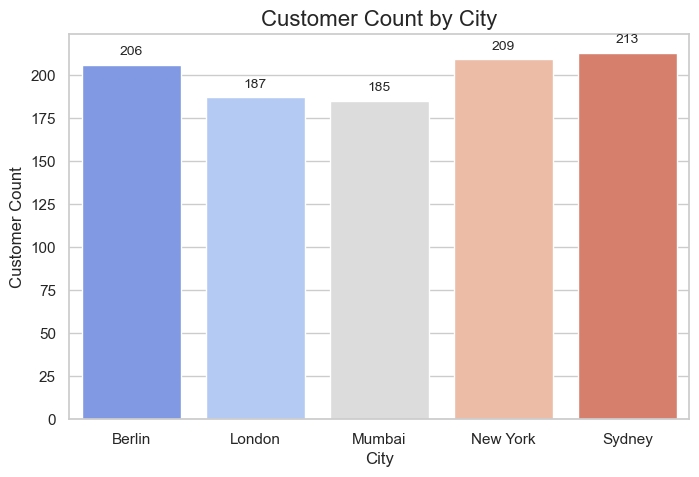

In [21]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8,5))
barplot = sns.barplot(x='city', y='customer count', data=city_customer, palette='coolwarm')

# Add data labels on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

# Add title and labels
plt.title('Customer Count by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)

# Display plot
plt.show()

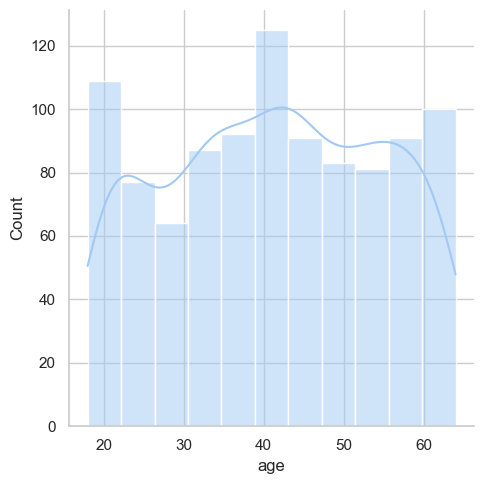

In [22]:
# Age Distribution of All the Customers
sns.displot(customer['age'],kde=True)

In [23]:
# Genderwise Customer Distribution
gender_df=customer.groupby(['gender']).agg({'customer_id':'count'}).rename(columns={'customer_id':'customer count'}).reset_index()
gender_df

,gender,customer count
0,Female,501
1,Male,499


([<matplotlib.patches.Wedge at 0x2025a7e5d30>,
 [Text(-1.0999945720746371, -0.003455633999197001, 'Female'),
  Text(1.0999945717725317, 0.0034557301637804672, 'Male')],
 [Text(-0.5999970393134383, -0.001884891272289273, '50.1%'),
  Text(0.5999970391486535, 0.0018849437256984365, '49.9%')])

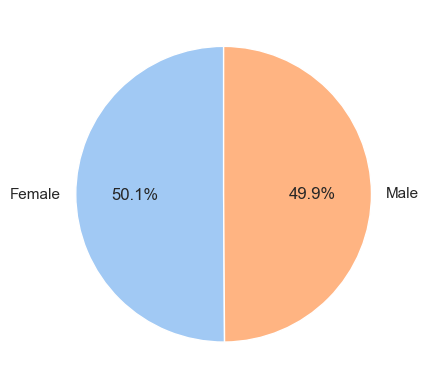

In [24]:
plt.pie(gender_df['customer count'], labels=gender_df['gender'], autopct='%1.1f%%', startangle=90)

In [25]:
city_gender=customer.groupby(['city','gender']).agg({'customer_id':'count'}).rename(columns={'customer_id':'customer count'}).reset_index()

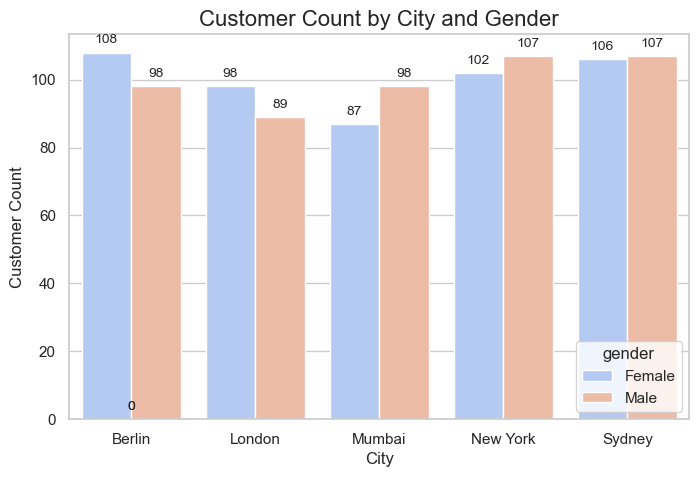

In [26]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='city', y='customer count', hue='gender', data=city_gender, palette='coolwarm')

# Add data labels on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

# Add title and labels
plt.title('Customer Count by City and Gender', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)

# Display plot
plt.show()

2. Cart Analysis

In [27]:
product_cart=pd.merge(product,fact,how='inner',on='product_id')
product_cart_qty=product_cart.groupby(['product_name']).agg({'quantity':'sum'}).reset_index()
product_cart_qty['Rank']=product_cart_qty['quantity'].rank(method='dense',ascending=False)
top_10_product=product_cart_qty[product_cart_qty['Rank']<=10].sort_values(by=['Rank'])

C:\Users\nehas\AppData\Local\Temp\ipykernel_4848\1382070607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product_name', y='quantity', data=top_10_product, palette='coolwarm', edgecolor='black')


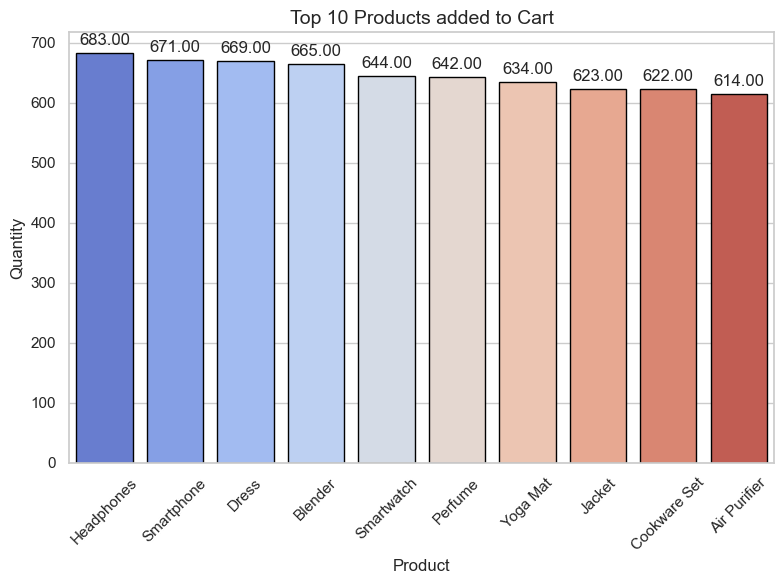

In [28]:
# Setting figure size
plt.figure(figsize=(8,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='product_name', y='quantity', data=top_10_product, palette='coolwarm', edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 10 Products added to Cart', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

In [29]:
# Top 3 Products of each category added to cart
category_product_cart=product_cart.groupby(['category','product_name']).agg({'quantity':'sum'}).reset_index()
category_product_cart['Rank']=category_product_cart.groupby(['category'])['quantity'].rank(method='dense',ascending=False)
top_2_cateory_product=category_product_cart[category_product_cart['Rank']<=3].sort_values(by=['category','Rank'],ascending=[True,True])

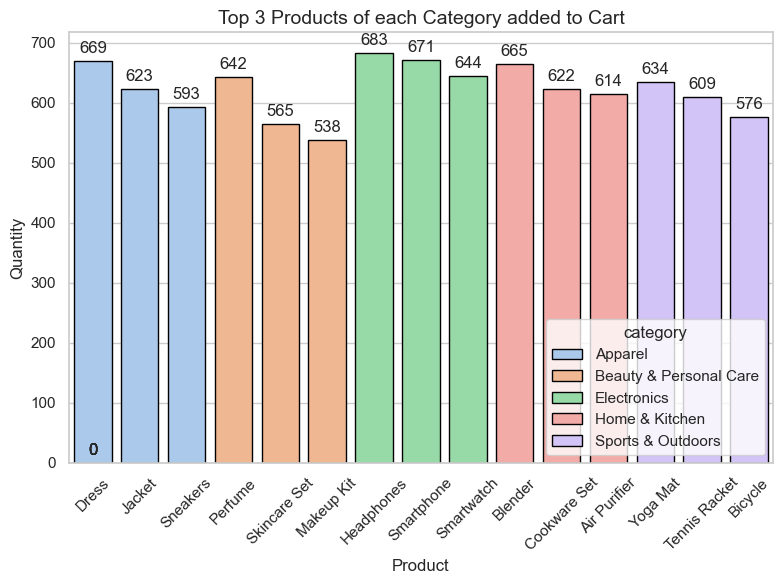

In [30]:
# Setting figure size
plt.figure(figsize=(8,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='product_name', y='quantity', data=top_2_cateory_product, hue='category', edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 3 Products of each Category added to Cart', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

In [31]:
customer_cart=pd.merge(customer,fact,how='inner',on='customer_id')
customer_cart_qty=customer_cart.groupby(['customer_name']).agg({'quantity':'sum'}).reset_index()
customer_cart_qty['Rank']=customer_cart_qty['quantity'].rank(method='dense',ascending=False)
top_customer_cart=customer_cart_qty[customer_cart_qty['Rank']<=5].sort_values(by=['Rank'])


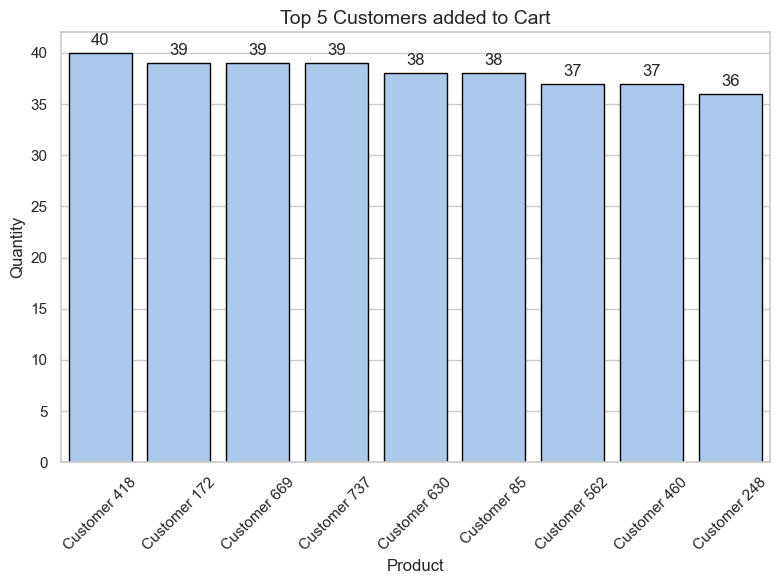

In [32]:
# Setting figure size
plt.figure(figsize=(8,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='customer_name', y='quantity', data=top_customer_cart, edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 5 Customers added to Cart', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

In [33]:
product_cart['cart amount'] = product_cart['quantity'] * product_cart['price']
customer_product_cart=pd.merge(product_cart,customer,how='inner',on='customer_id')
city_cart=customer_product_cart.groupby(['city']).agg({'quantity':'sum','cart amount':'sum'}).reset_index()

C:\Users\nehas\AppData\Local\Temp\ipykernel_4848\4103861245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='cart amount', data=city_cart, palette='coolwarm', edgecolor='black', ax=ax1, alpha=0.6)


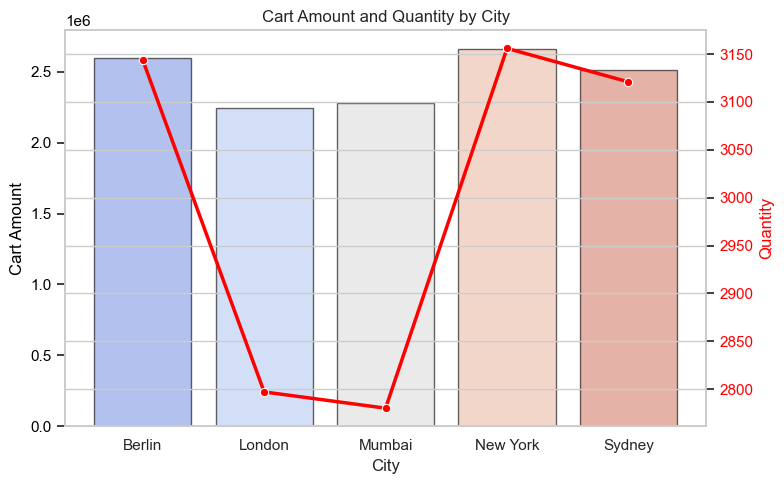

In [34]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(8, 5))

# Create bar plot for cart amount
sns.barplot(x='city', y='cart amount', data=city_cart, palette='coolwarm', edgecolor='black', ax=ax1, alpha=0.6)
ax1.set_ylabel('Cart Amount', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(False)

# Create a second y-axis for the quantity line plot
ax2 = ax1.twinx()
sns.lineplot(x='city', y='quantity', data=city_cart, color='red', marker='o', ax=ax2, linewidth=2.5)
ax2.set_ylabel('Quantity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and labels
plt.title('Cart Amount and Quantity by City')
ax1.set_xlabel('City')

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
city_gender_cartamount=customer_product_cart.groupby(['city','gender']).agg({'cart amount':'sum'}).reset_index()
city_gender_cartamount['cart amount thousands']=city_gender_cartamount['cart amount']/1000
city_gender_cartamount['cart amount thousands']=city_gender_cartamount['cart amount thousands'].round(2)

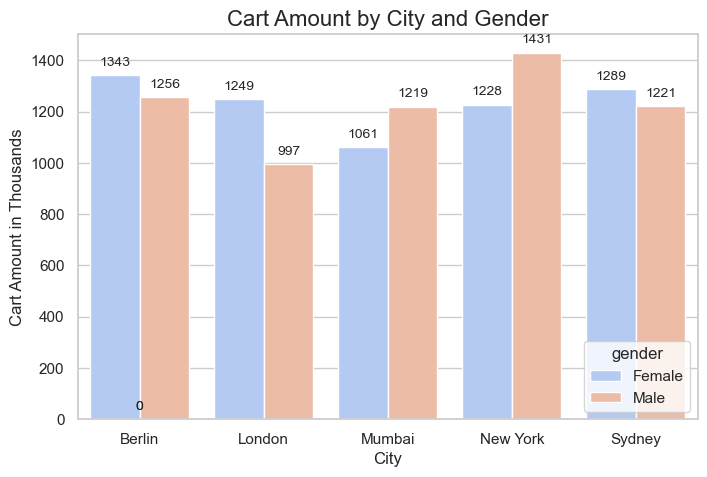

In [36]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='city', y='cart amount thousands', hue='gender', data=city_gender_cartamount, palette='coolwarm')

# Add data labels on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

# Add title and labels
plt.title('Cart Amount by City and Gender', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Cart Amount in Thousands', fontsize=12)

# Display plot
plt.show()

In [37]:
customer_product_cart['abandonment qty']=np.where(pd.isna(customer_product_cart['abandonment_time']),0,customer_product_cart['quantity'])

# Cart Abandonment Rate

In [38]:
# Product-Specific Cart Abandonment Rate
prodcut_abandonment=customer_product_cart.groupby(['product_name']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
prodcut_abandonment['abandonment rate']=prodcut_abandonment['abandonment qty']*100/prodcut_abandonment['quantity']
prodcut_abandonment['abandonment rate']=prodcut_abandonment['abandonment rate'].round(2)
prodcut_abandonment['Rank']=prodcut_abandonment['abandonment rate'].rank(method='dense',ascending=False)
top_10_product_abandonment_rate=prodcut_abandonment[prodcut_abandonment['Rank']<=10].sort_values(by=['Rank'])

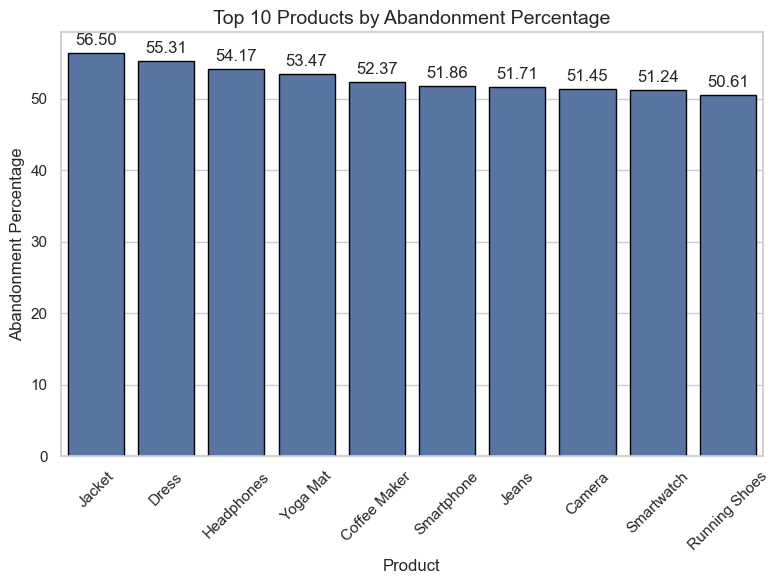

In [39]:
# Setting figure size
plt.figure(figsize=(8,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='product_name', y='abandonment rate', data=top_10_product_abandonment_rate, edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 10 Products by Abandonment Percentage', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Abandonment Percentage', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

In [41]:
# Categorywise Abandnoment Rate
category_abandnoment=customer_product_cart.groupby(['category']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
category_abandnoment['abandonment rate']=category_abandnoment['abandonment qty']*100/category_abandnoment['quantity']
category_abandnoment['abandonment rate']=category_abandnoment['abandonment rate'].round(2)

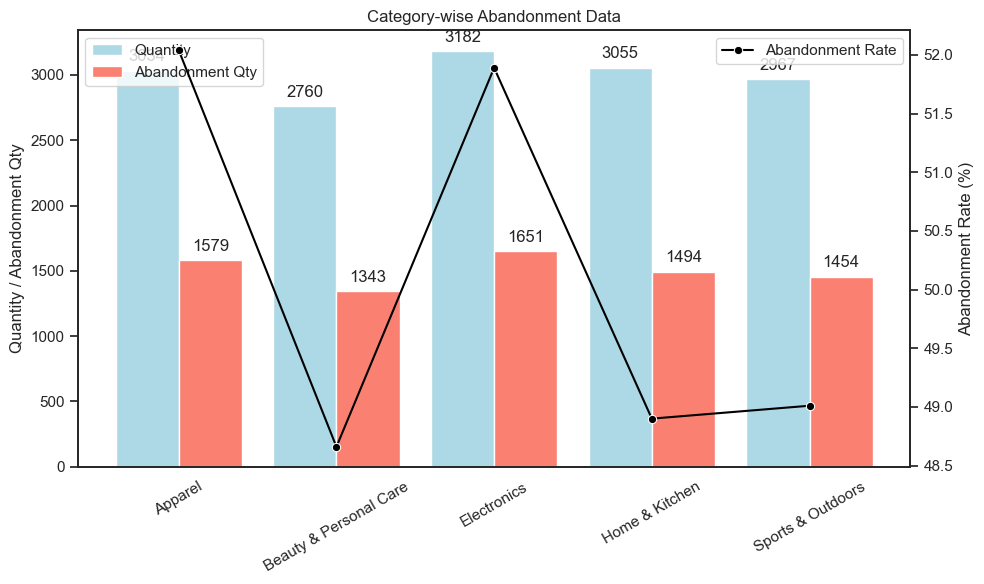

In [42]:
# Set the plot style without gridlines
sns.set(style="white")

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set bar width and positions for side-by-side bars
bar_width = 0.4
index = np.arange(len(category_abandnoment['category']))

# Plot side-by-side bar charts for 'quantity' and 'abandonment_qty'
bars1 = ax1.bar(index - bar_width/2, category_abandnoment['quantity'], bar_width, label='Quantity', color='lightblue')
bars2 = ax1.bar(index + bar_width/2, category_abandnoment['abandonment qty'], bar_width, label='Abandonment Qty', color='salmon')

# Set x-ticks and labels
ax1.set_xticks(index)
ax1.set_xticklabels(category_abandnoment['category'], rotation=30)

# Add data labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Create a second y-axis to plot the abandonment rate
ax2 = ax1.twinx()
sns.lineplot(x=index, y='abandonment rate', data=category_abandnoment, color='black', marker='o', label='Abandonment Rate', ax=ax2)

# Remove gridlines from both axes
ax1.grid(False)
ax2.grid(False)

# Add labels and title
ax1.set_ylabel('Quantity / Abandonment Qty')
ax2.set_ylabel('Abandonment Rate (%)')
plt.title('Category-wise Abandonment Data')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

In [43]:
# Device-Specific Cart Abandonment Rate
customer_product_device_cart=pd.merge(device,customer_product_cart,how='inner',on='device_id')
customer_product_device_abandnoment=customer_product_device_cart.groupby(['device_type']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
customer_product_device_abandnoment['abandonment rate']=customer_product_device_abandnoment['abandonment qty']*100/customer_product_device_abandnoment['quantity']
customer_product_device_abandnoment['abandonment rate']=customer_product_device_abandnoment['abandonment rate'].round(2)

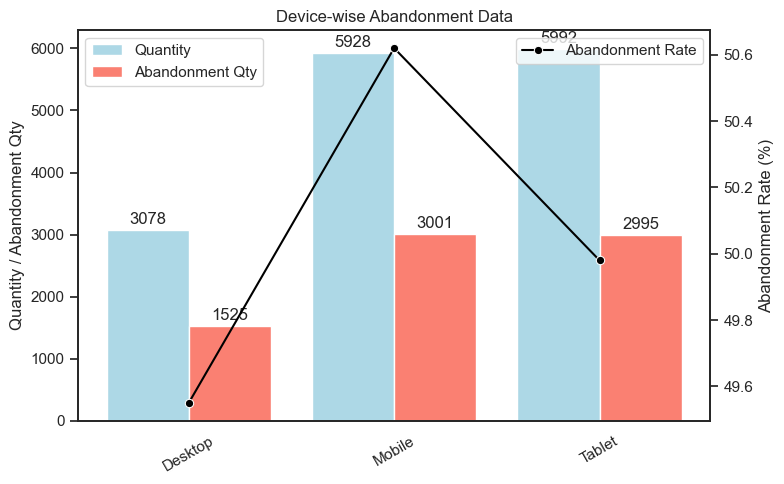

In [44]:
# Set the plot style without gridlines
sns.set(style="white")

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Set bar width and positions for side-by-side bars
bar_width = 0.4
index = np.arange(len(customer_product_device_abandnoment['device_type']))

# Plot side-by-side bar charts for 'quantity' and 'abandonment_qty'
bars1 = ax1.bar(index - bar_width/2, customer_product_device_abandnoment['quantity'], bar_width, label='Quantity', color='lightblue')
bars2 = ax1.bar(index + bar_width/2, customer_product_device_abandnoment['abandonment qty'], bar_width, label='Abandonment Qty', color='salmon')

# Set x-ticks and labels
ax1.set_xticks(index)
ax1.set_xticklabels(customer_product_device_abandnoment['device_type'], rotation=30)

# Add data labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Create a second y-axis to plot the abandonment rate
ax2 = ax1.twinx()
sns.lineplot(x=index, y='abandonment rate', data=customer_product_device_abandnoment, color='black', marker='o', label='Abandonment Rate', ax=ax2)

# Remove gridlines from both axes
ax1.grid(False)
ax2.grid(False)

# Add labels and title
ax1.set_ylabel('Quantity / Abandonment Qty')
ax2.set_ylabel('Abandonment Rate (%)')
plt.title('Device-wise Abandonment Data')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

In [45]:
# Top 3 Product of Each Category By Abandnoment Rate
category_product_abandnoment=customer_product_cart.groupby(['category','product_name']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
category_product_abandnoment['abandonment rate']=category_product_abandnoment['abandonment qty']*100/category_product_abandnoment['quantity']
category_product_abandnoment['abandonment rate']=category_product_abandnoment['abandonment rate'].round(2)
category_product_abandnoment['Rank']=category_product_abandnoment.groupby(['category'])['abandonment rate'].rank(method='dense',ascending=False)
top_3_abandnoment_rate=category_product_abandnoment[category_product_abandnoment['Rank']<=3].sort_values(by=['category','Rank'],ascending=[True,True])

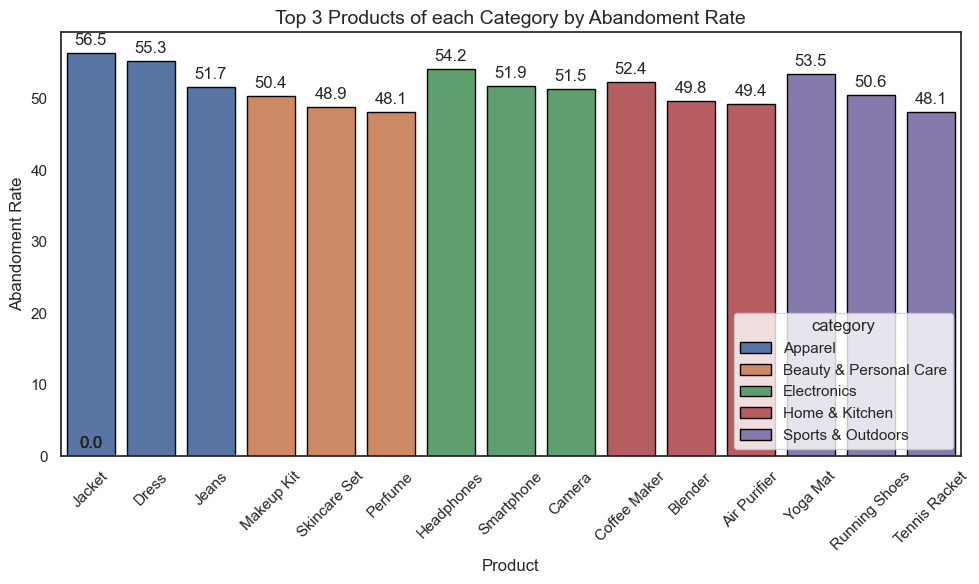

In [46]:
# Setting figure size
plt.figure(figsize=(10,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='product_name', y='abandonment rate', data=top_3_abandnoment_rate, hue='category', edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 3 Products of each Category by Abandoment Rate', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Abandoment Rate', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

In [47]:
# Customer-Specific Cart Abandonment Rate
city_CAR=customer_product_cart.groupby(['city']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
city_CAR['abandonment rate']=city_CAR['abandonment qty']*100/city_CAR['quantity']
city_CAR['abandonment rate']=city_CAR['abandonment rate'].round(2)

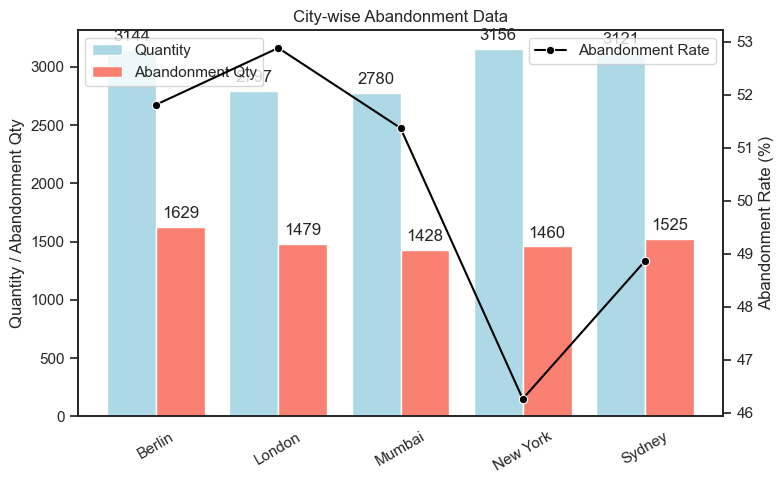

In [48]:
# Set the plot style without gridlines
sns.set(style="white")

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Set bar width and positions for side-by-side bars
bar_width = 0.4
index = np.arange(len(city_CAR['city']))

# Plot side-by-side bar charts for 'quantity' and 'abandonment_qty'
bars1 = ax1.bar(index - bar_width/2, city_CAR['quantity'], bar_width, label='Quantity', color='lightblue')
bars2 = ax1.bar(index + bar_width/2, city_CAR['abandonment qty'], bar_width, label='Abandonment Qty', color='salmon')

# Set x-ticks and labels
ax1.set_xticks(index)
ax1.set_xticklabels(city_CAR['city'], rotation=30)

# Add data labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Create a second y-axis to plot the abandonment rate
ax2 = ax1.twinx()
sns.lineplot(x=index, y='abandonment rate', data=city_CAR, color='black', marker='o', label='Abandonment Rate', ax=ax2)

# Remove gridlines from both axes
ax1.grid(False)
ax2.grid(False)

# Add labels and title
ax1.set_ylabel('Quantity / Abandonment Qty')
ax2.set_ylabel('Abandonment Rate (%)')
plt.title('City-wise Abandonment Data')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

In [49]:
# Cart Abandnomenr Rate Monthly Trend
monthly_abandnoment=pd.merge(date,customer_product_device_cart,how='left',on='date_id')
monthly_abandnoment['month']=monthly_abandnoment['date'].dt.strftime('%Y-%m')
monthly_abandnomentrate=monthly_abandnoment.groupby(['month']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
monthly_abandnomentrate['abandonment rate']=monthly_abandnomentrate['abandonment qty']*100/monthly_abandnomentrate['quantity']

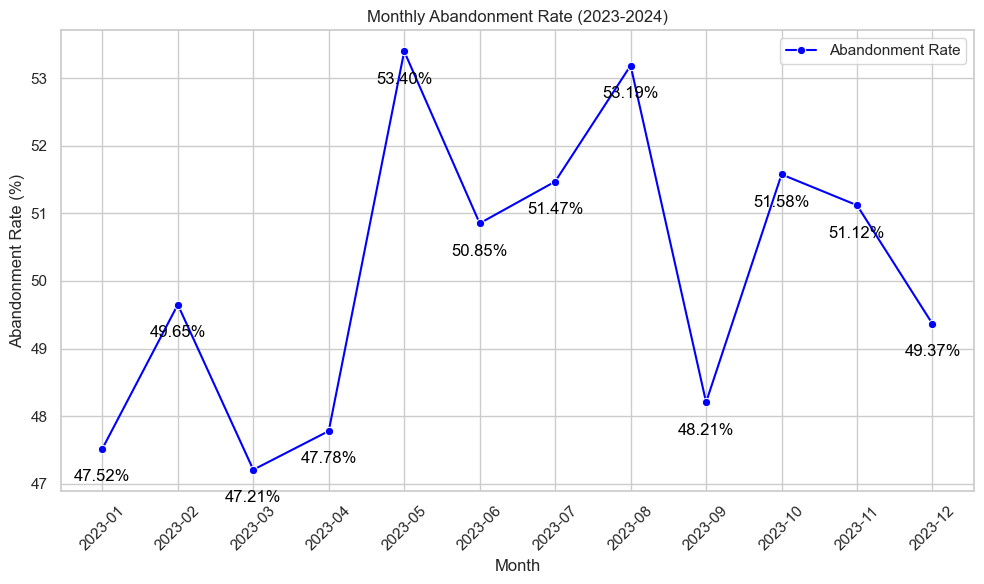

In [50]:
# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the line chart
sns.lineplot(x='month', y='abandonment rate', data=monthly_abandnomentrate, marker='o', color='blue', label='Abandonment Rate')

# Get y-axis limits to determine dynamic positioning of labels
y_min, y_max = plt.ylim()

# Add data labels for each point
for i, rate in enumerate(monthly_abandnomentrate['abandonment rate']):
    # Place the label above or below the point based on its value relative to the y-axis range
    offset = 0.3 if rate < (y_max - y_min) / 2 else -0.3  # Adjust the offset dynamically
    plt.text(i, rate + offset, f'{rate:.2f}%', ha='center', va='bottom' if offset > 0 else 'top', color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.ylabel('Abandonment Rate (%)')
plt.xlabel('Month')
plt.title('Monthly Abandonment Rate (2023-2024)')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()

In [51]:
# Device specific Abandonment Rate
device_abandonment=monthly_abandnoment.groupby(['month','device_type']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
device_abandonment['abandonment rate']=device_abandonment['abandonment qty']*100/device_abandonment['quantity']

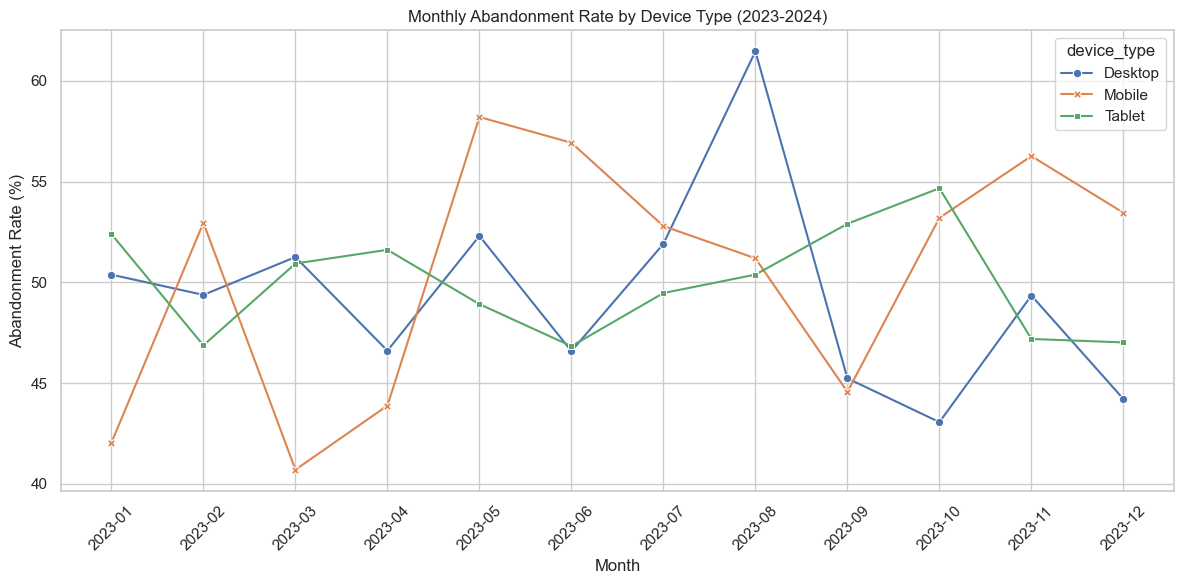

In [52]:
# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the line chart with Seaborn
sns.lineplot(x='month', y='abandonment rate', hue='device_type', style='device_type', markers=True, dashes=False, data=device_abandonment)

# Add labels and title
plt.ylabel('Abandonment Rate (%)')
plt.xlabel('Month')
plt.title('Monthly Abandonment Rate by Device Type (2023-2024)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visualization
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [53]:
# Product Category wise Cart Abandonment
category_monthly=monthly_abandnoment.groupby(['month','category']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
category_monthly['abandonment rate']=category_monthly['abandonment qty']*100/category_monthly['quantity']

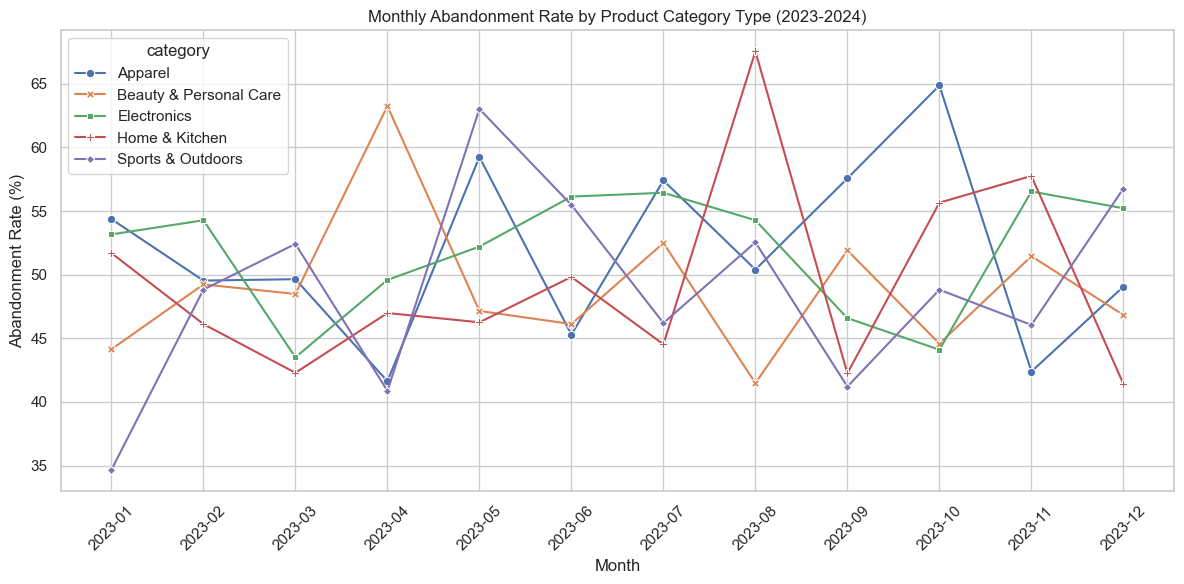

In [54]:
# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the line chart with Seaborn
sns.lineplot(x='month', y='abandonment rate', hue='category', style='category', markers=True, dashes=False, data=category_monthly)

# Add labels and title
plt.ylabel('Abandonment Rate (%)')
plt.xlabel('Month')
plt.title('Monthly Abandonment Rate by Product Category Type (2023-2024)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visualization
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Cohort Analysis

In [55]:
monthly_abandnoment['Order_Month'] = monthly_abandnoment['date'].dt.to_period('M')
monthly_abandnoment['Cohort']=monthly_abandnoment.groupby(['customer_id'])['date'].transform('min').dt.to_period('M')
df_ch1=monthly_abandnoment.groupby(['Order_Month','Cohort']).agg({'customer_id':'nunique'}).reset_index().rename(columns={'customer_id':'unique customers'})

In [56]:
from operator import attrgetter
df_ch1['Cohort_Periods'] = (df_ch1.Order_Month - df_ch1.Cohort).apply(attrgetter('n'))
cohort_pivot=df_ch1.pivot(index='Cohort',columns='Cohort_Periods',values='unique customers')

In [57]:
retention_percentage = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohort_size = cohort_pivot.iloc[:, 0]

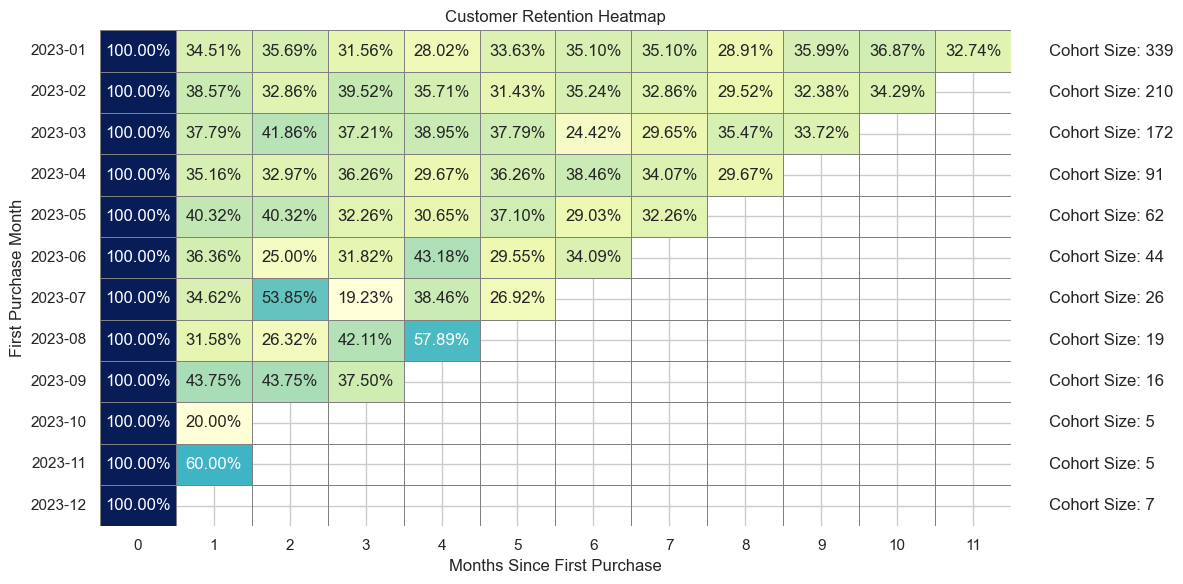

In [58]:
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(data=retention_percentage, annot=True, cmap='YlGnBu', fmt='.2%', linewidths=0.5, linecolor='gray',cbar=False)
plt.title('Customer Retention Heatmap')
plt.xlabel('Months Since First Purchase')
plt.ylabel('First Purchase Month')

# Add cohort size as annotations
for i in range(len(cohort_size)):
    plt.text(len(cohort_size) + 0.5, i + 0.5, f'Cohort Size: {int(cohort_size.iloc[i])}', va='center', ha='left')

plt.tight_layout()
plt.show()

In [59]:
monthlt_abandnoment_rate=monthly_abandnoment.groupby(['Order_Month','Cohort']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
monthlt_abandnoment_rate['abandonment rate']=monthlt_abandnoment_rate['abandonment qty']*100/monthlt_abandnoment_rate['quantity']
monthlt_abandnoment_rate['abandonment rate']=monthlt_abandnoment_rate['abandonment rate'].round(2)
df_ch2=monthlt_abandnoment_rate

In [60]:

df_ch2['Cohort_Periods'] = (df_ch2.Order_Month - df_ch2.Cohort).apply(attrgetter('n'))
abandonment_cohort_pivot=df_ch2.pivot(index='Cohort',columns='Cohort_Periods',values='abandonment rate')
abandonment_cohort_pivot=abandonment_cohort_pivot.reset_index()

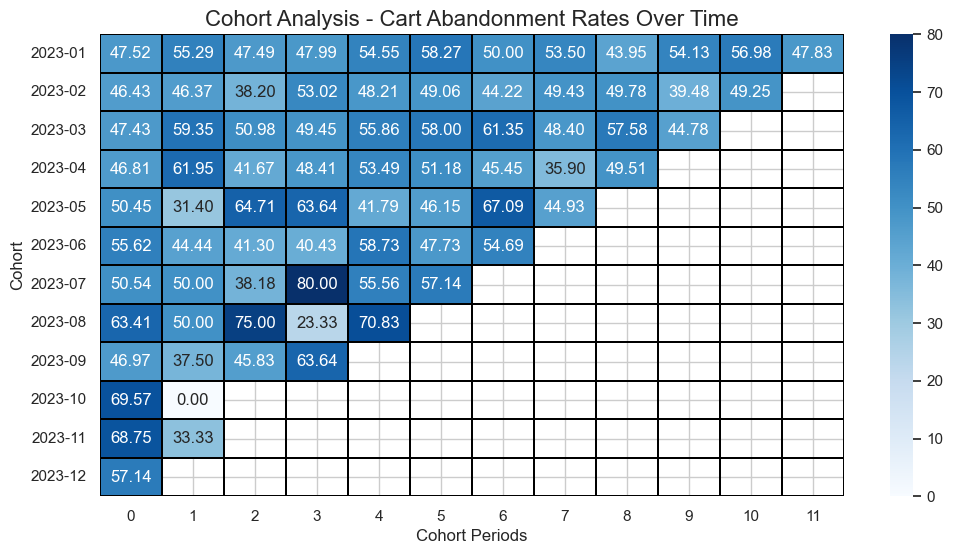

In [61]:
# Set 'Cohort' as the index
abandonment_cohort_pivot.set_index('Cohort', inplace=True)

# Set plot size
plt.figure(figsize=(12, 6))

# Create the heatmap
sns.heatmap(abandonment_cohort_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.2, linecolor='black')

# Add title and labels
plt.title('Cohort Analysis - Cart Abandonment Rates Over Time', fontsize=16)
plt.xlabel('Cohort Periods', fontsize=12)
plt.ylabel('Cohort', fontsize=12)

# Show the plot
plt.show()

In [63]:
cities=monthly_abandnoment['city'].unique()
cities

array(['Sydney', 'New York', 'Mumbai', 'Berlin', 'London'], dtype=object)

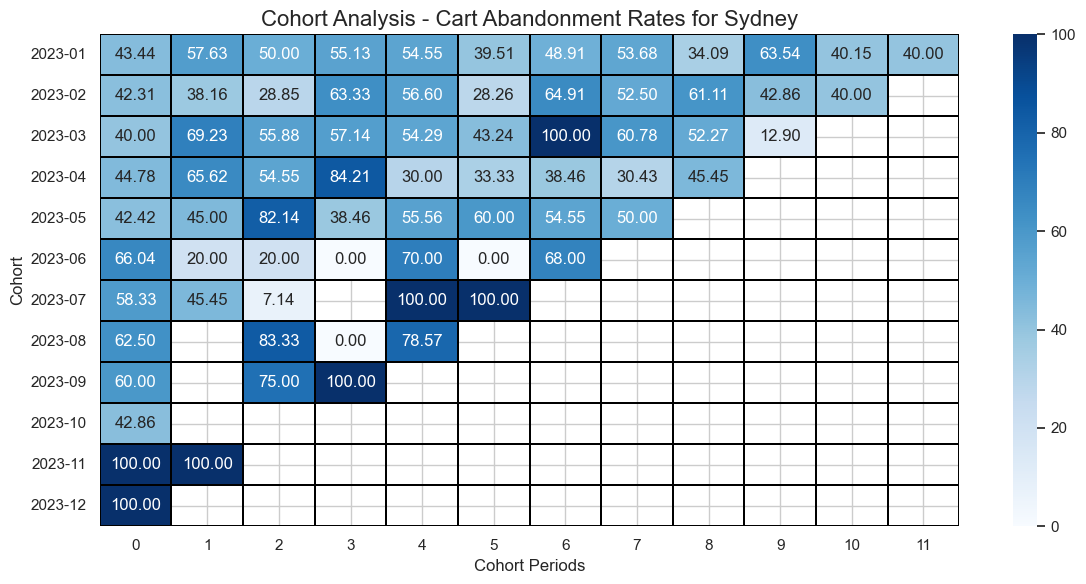

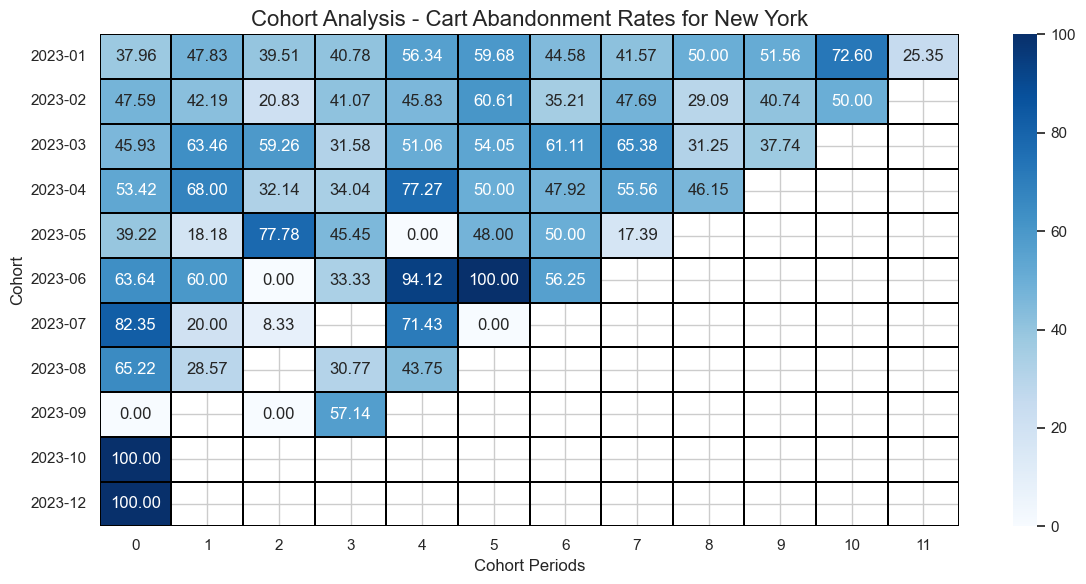

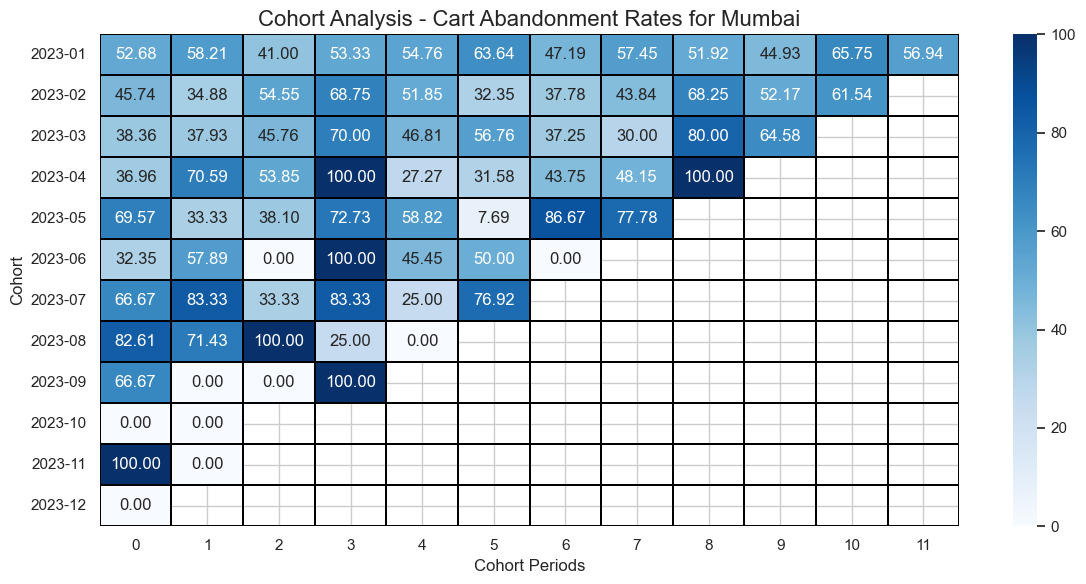

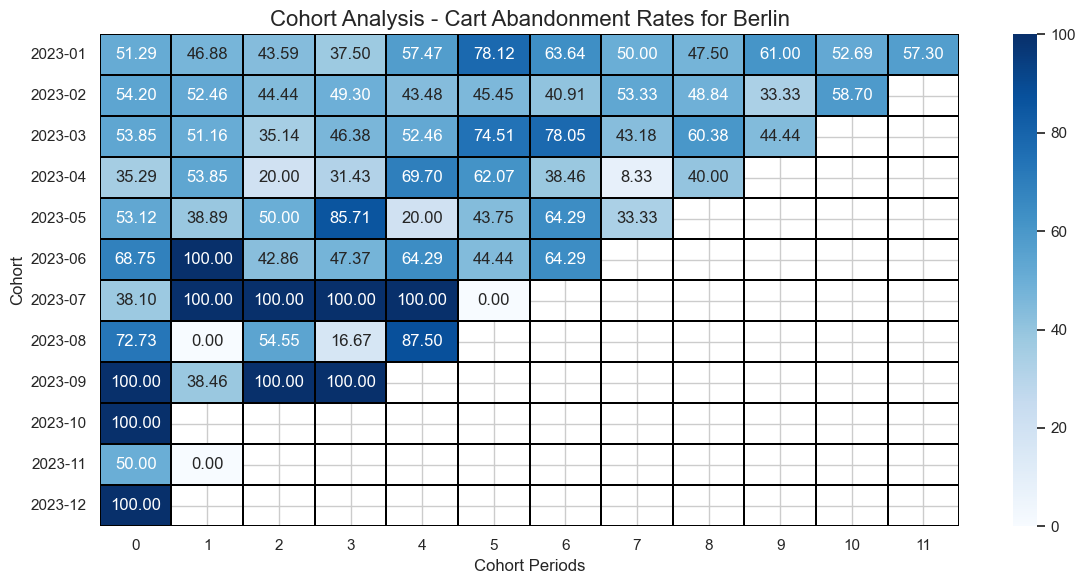

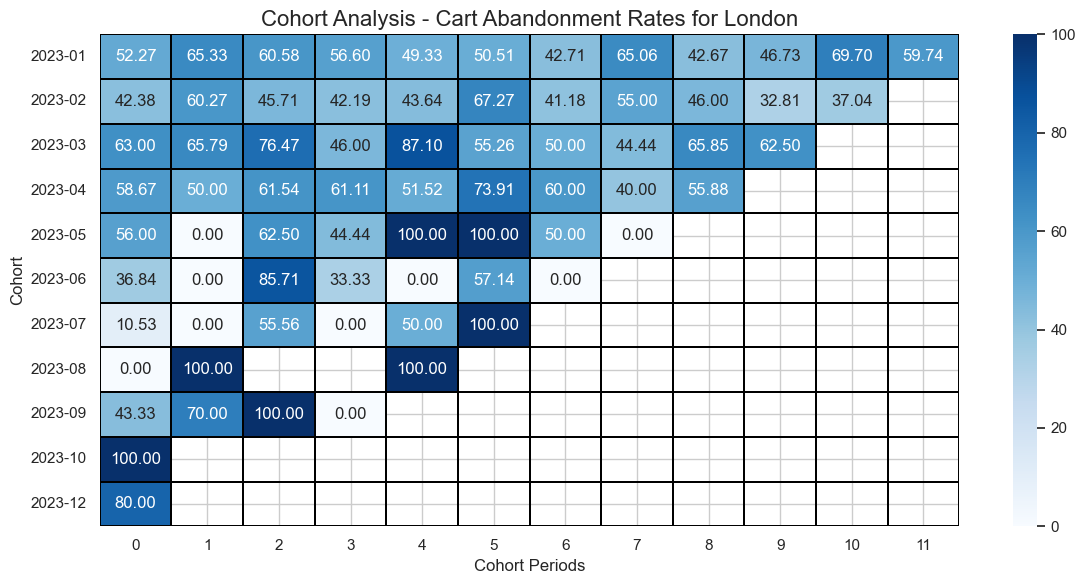

In [64]:
for i in cities:
    # Filter data by city
    city_cohort = monthly_abandnoment[monthly_abandnoment['city'] == i]
    
    # Group by 'Order_Month' and 'Cohort', aggregating quantity and abandonment qty
    city_cohort1 = city_cohort.groupby(['Order_Month', 'Cohort']).agg({'quantity': 'sum','abandonment qty': 'sum'}).reset_index()

    # Calculate abandonment rate
    city_cohort1['abandonment rate'] = (city_cohort1['abandonment qty'] / city_cohort1['quantity']) * 100
    city_cohort1['abandonment rate'] = city_cohort1['abandonment rate'].round(2)

    # Calculate Cohort_Periods (difference in months between Order_Month and Cohort)
    city_cohort1['Cohort_Periods'] = (city_cohort1['Order_Month'] - city_cohort1['Cohort']).apply(attrgetter('n'))

    # Pivot data to create cohort heatmap structure
    city_cohort1_pivot = city_cohort1.pivot(index='Cohort', columns='Cohort_Periods', values='abandonment rate')

    # Set 'Cohort' as the index
    city_cohort1_pivot.reset_index(inplace=True)
    city_cohort1_pivot.set_index('Cohort', inplace=True)

    # Set plot size
    plt.figure(figsize=(12, 6))

    # Create the heatmap
    sns.heatmap(city_cohort1_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.2, linecolor='black')

    # Add title and labels
    plt.title(f'Cohort Analysis - Cart Abandonment Rates for {i}', fontsize=16)
    plt.xlabel('Cohort Periods', fontsize=12)
    plt.ylabel('Cohort', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

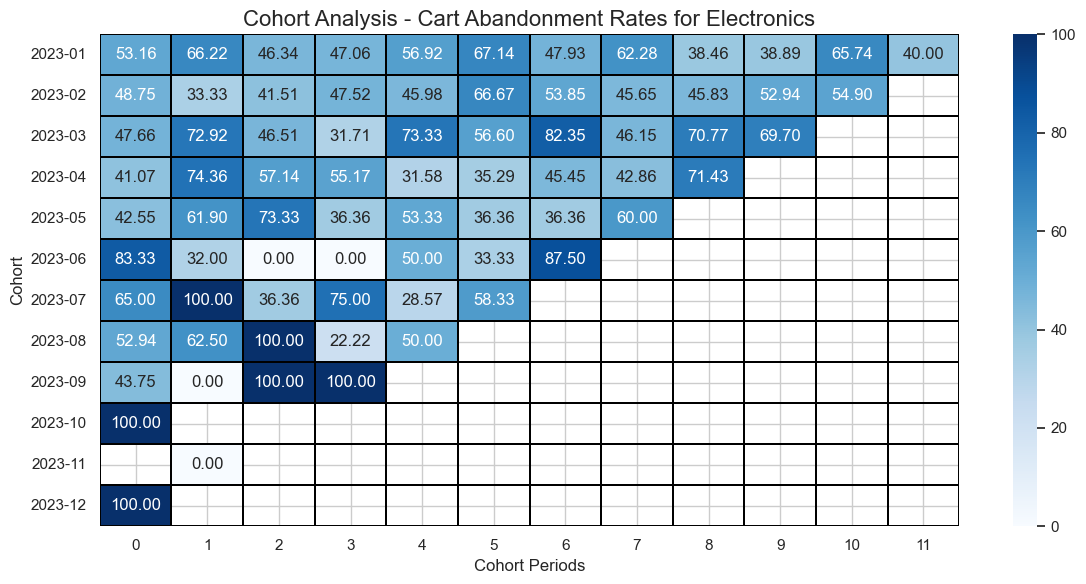

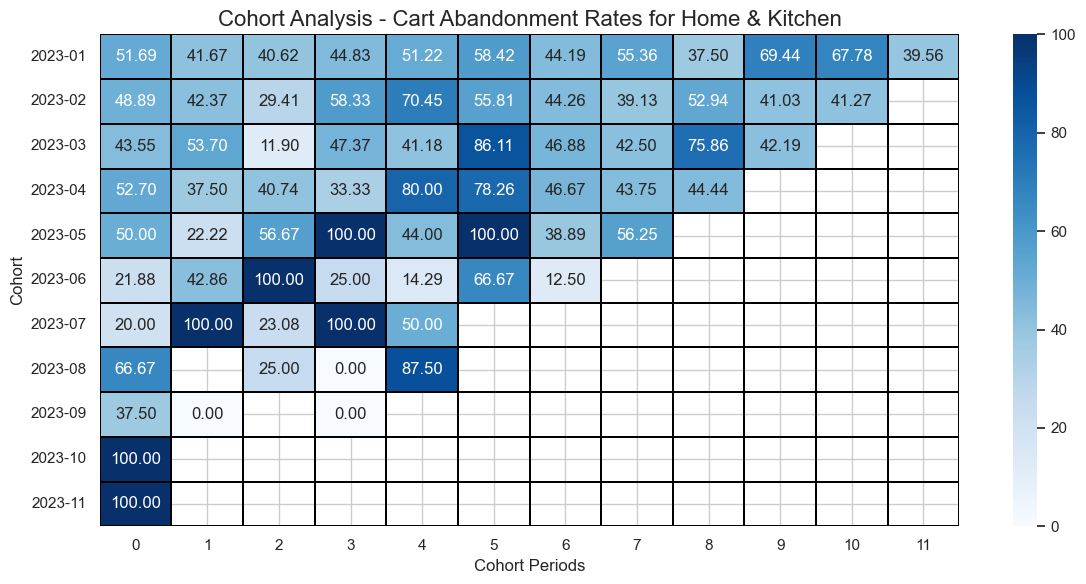

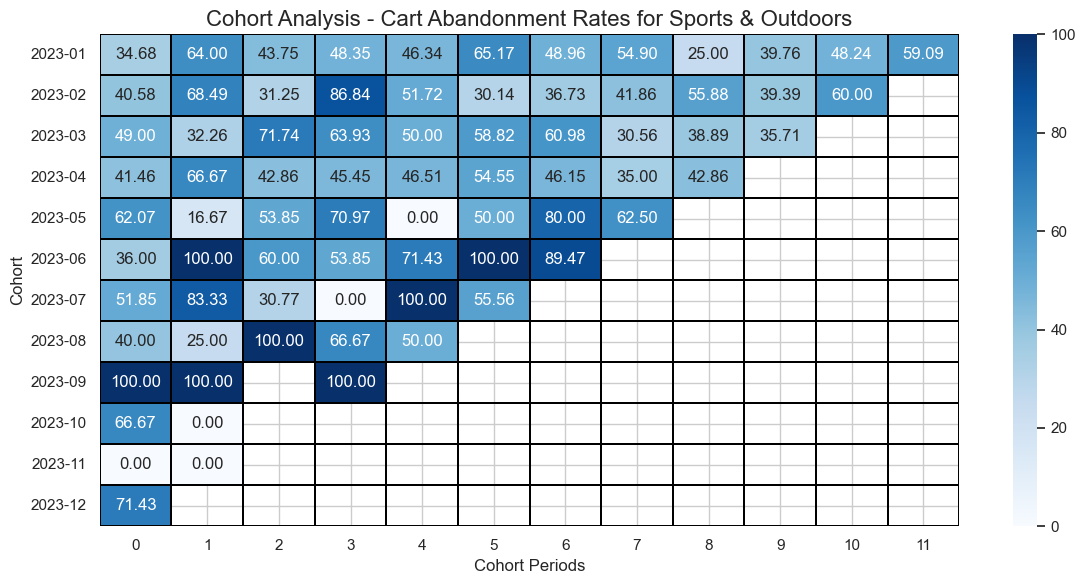

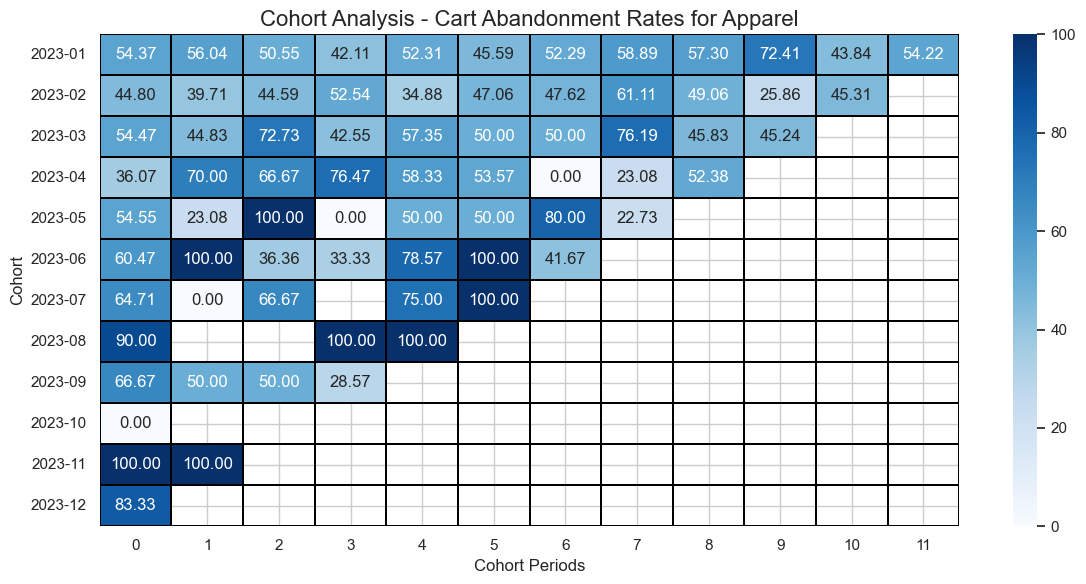

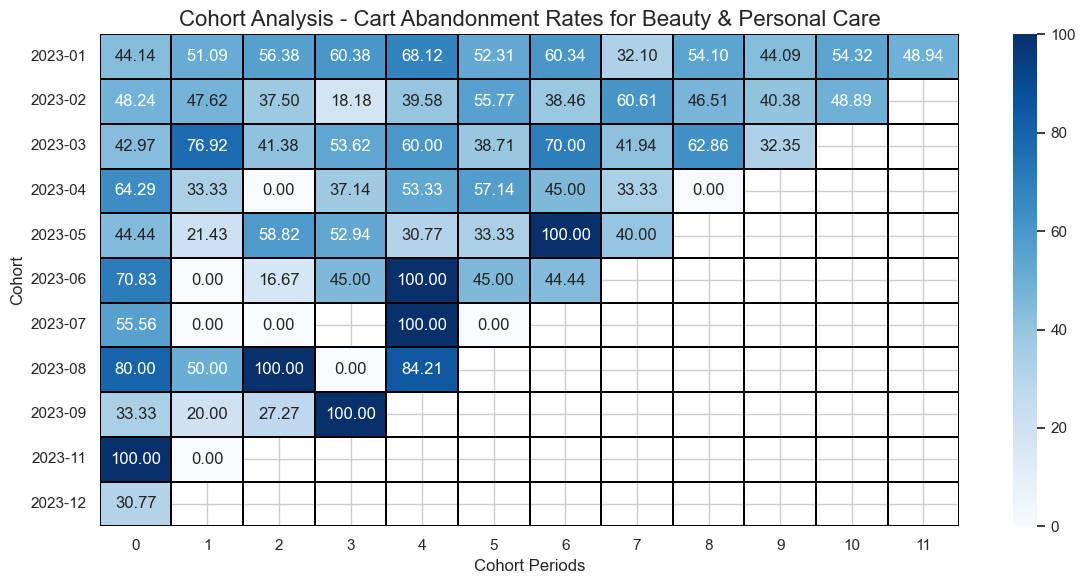

In [66]:
category=monthly_abandnoment['category'].unique()
for i in category:
    # Filter data by city
    category_cohort = monthly_abandnoment[monthly_abandnoment['category'] == i]
    
    # Group by 'Order_Month' and 'Cohort', aggregating quantity and abandonment qty
    category_cohort1 = category_cohort.groupby(['Order_Month', 'Cohort']).agg({'quantity': 'sum','abandonment qty': 'sum'}).reset_index()

    # Calculate abandonment rate
    category_cohort1['abandonment rate'] = (category_cohort1['abandonment qty'] / category_cohort1['quantity']) * 100
    category_cohort1['abandonment rate'] = category_cohort1['abandonment rate'].round(2)

    # Calculate Cohort_Periods (difference in months between Order_Month and Cohort)
    category_cohort1['Cohort_Periods'] = (category_cohort1['Order_Month'] - category_cohort1['Cohort']).apply(attrgetter('n'))

    # Pivot data to create cohort heatmap structure
    category_cohort1_pivot = category_cohort1.pivot(index='Cohort', columns='Cohort_Periods', values='abandonment rate')

    # Set 'Cohort' as the index
    category_cohort1_pivot.reset_index(inplace=True)
    category_cohort1_pivot.set_index('Cohort', inplace=True)

    # Set plot size
    plt.figure(figsize=(12, 6))

    # Create the heatmap
    sns.heatmap(category_cohort1_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.2, linecolor='black')

    # Add title and labels
    plt.title(f'Cohort Analysis - Cart Abandonment Rates for {i}', fontsize=16)
    plt.xlabel('Cohort Periods', fontsize=12)
    plt.ylabel('Cohort', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

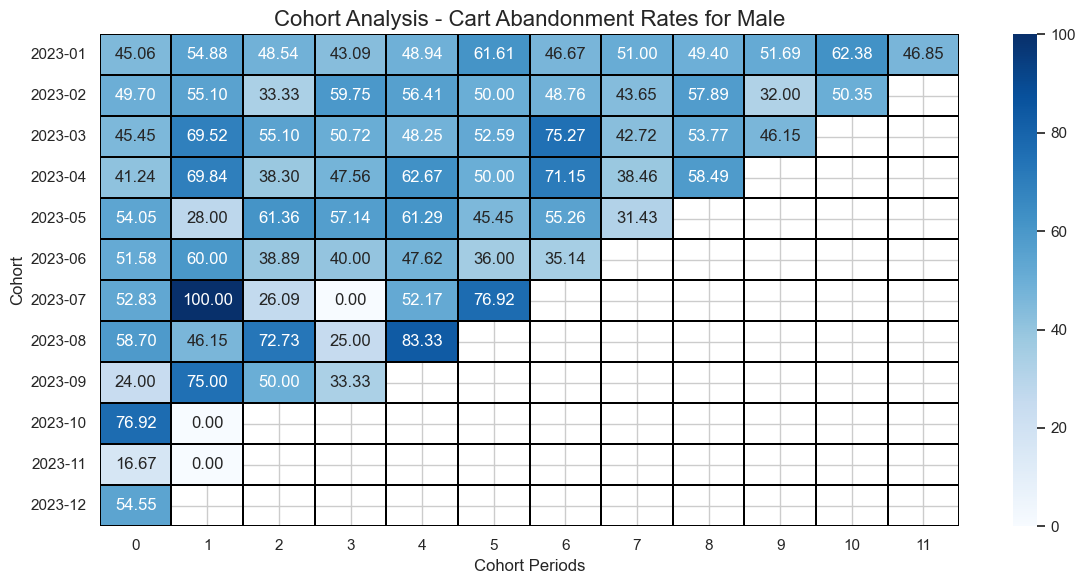

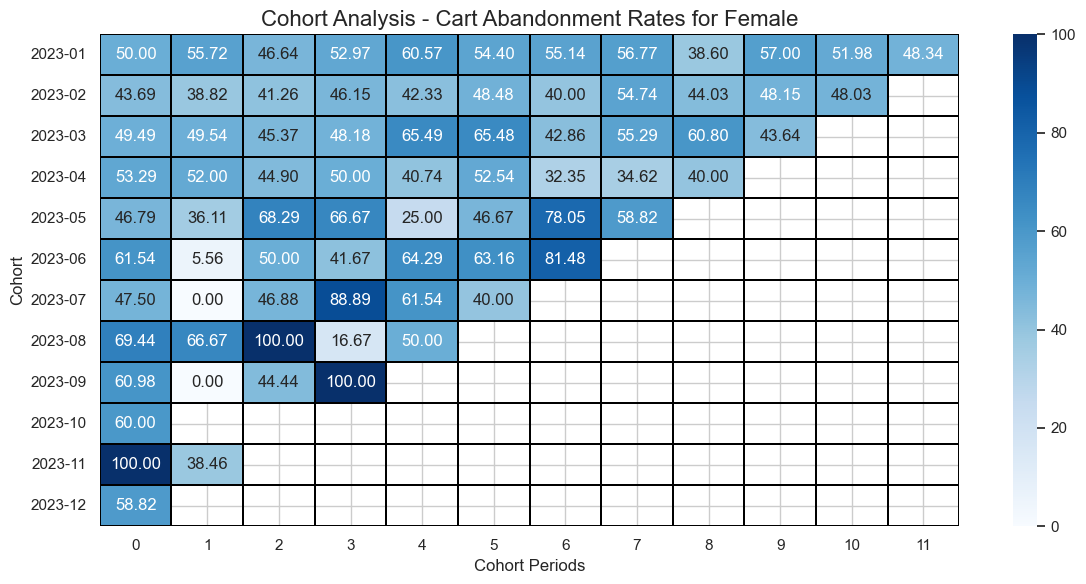

In [67]:
gender=monthly_abandnoment['gender'].unique()
for i in gender:
    # Filter data by city
    gender_cohort = monthly_abandnoment[monthly_abandnoment['gender'] == i]
    
    # Group by 'Order_Month' and 'Cohort', aggregating quantity and abandonment qty
    gender_cohort1 = gender_cohort.groupby(['Order_Month', 'Cohort']).agg({'quantity': 'sum','abandonment qty': 'sum'}).reset_index()

    # Calculate abandonment rate
    gender_cohort1['abandonment rate'] = (gender_cohort1['abandonment qty'] / gender_cohort1['quantity']) * 100
    gender_cohort1['abandonment rate'] = gender_cohort1['abandonment rate'].round(2)

    # Calculate Cohort_Periods (difference in months between Order_Month and Cohort)
    gender_cohort1['Cohort_Periods'] = (gender_cohort1['Order_Month'] - gender_cohort1['Cohort']).apply(attrgetter('n'))

    # Pivot data to create cohort heatmap structure
    gender_cohort1_pivot = gender_cohort1.pivot(index='Cohort', columns='Cohort_Periods', values='abandonment rate')

    # Set 'Cohort' as the index
    gender_cohort1_pivot.reset_index(inplace=True)
    gender_cohort1_pivot.set_index('Cohort', inplace=True)

    # Set plot size
    plt.figure(figsize=(12, 6))

    # Create the heatmap
    sns.heatmap(gender_cohort1_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.2, linecolor='black')

    # Add title and labels
    plt.title(f'Cohort Analysis - Cart Abandonment Rates for {i}', fontsize=16)
    plt.xlabel('Cohort Periods', fontsize=12)
    plt.ylabel('Cohort', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Hypothesis Testing

In [68]:
male_abandnoment=monthly_abandnoment[monthly_abandnoment['gender']=='Male'][['quantity','abandonment qty']]
male_abandnoment['abandnoment rate']=male_abandnoment['abandonment qty']*100/male_abandnoment['quantity']

In [69]:
female_abandnoment=monthly_abandnoment[monthly_abandnoment['gender']=='Female'][['quantity','abandonment qty']]
female_abandnoment['abandnoment rate']=female_abandnoment['abandonment qty']*100/female_abandnoment['quantity']


In [70]:
sample_male=male_abandnoment['abandnoment rate'].sample(25)
sample_female=female_abandnoment['abandnoment rate'].sample(25)
alpha=0.05

In [71]:
pop_male=male_abandnoment['abandnoment rate'].mean()
pop_female=female_abandnoment['abandnoment rate'].mean()
pop_male,pop_female

(np.float64(50.442477876106196), np.float64(50.519169329073485))

In [72]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print("Shapiro-Wilk test for male users:", shapiro_male)
print("Shapiro-Wilk test for female users:", shapiro_female)

Shapiro-Wilk test for male users: ShapiroResult(statistic=np.float64(0.6386733234879656), pvalue=np.float64(1.2072000849439953e-06))
Shapiro-Wilk test for female users: ShapiroResult(statistic=np.float64(0.6340094308868554), pvalue=np.float64(1.0609921987075107e-06))


In [73]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(sample_male, sample_female)
print(levene_test)

LeveneResult(statistic=np.float64(0.07741935483870968), pvalue=np.float64(0.7820206807130803))


In [74]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(sample_male, sample_female)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: 0.27824333745610097
p-value: 0.3910103403565404


In [75]:
p_value=p_value/2
if p_value<alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

Failed to Reject Null Hypothesis


In [76]:
monthly_abandnoment['abandonment_rate']=monthly_abandnoment['abandonment qty']*100/monthly_abandnoment['quantity']

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [78]:
# Fit the model
model = ols('abandonment_rate~device_type', data=monthly_abandnoment.sample(50)).fit()
    
# Perform ANOVA
aov_table = sm.stats.anova_lm(model, type=2)
print(aov_table)

               df     sum_sq  mean_sq    F  PR(>F)
device_type  2.00      79.44    39.72 0.02    0.99
Residual    47.00 124,120.56 2,640.86  NaN     NaN


In [79]:
# Perform pairwise t-tests
pairwise_t = model.t_test_pairwise('device_type')
print(pairwise_t.result_frame)

                coef  std err     t  P>|t|  Conf. Int. Low  Conf. Int. Upp.  \
Mobile-Desktop -1.21    18.50 -0.07   0.95          -38.43            36.00   
Tablet-Desktop  1.71    18.70  0.09   0.93          -35.92            39.34   
Tablet-Mobile   2.92    16.90  0.17   0.86          -31.08            36.93   

                pvalue-hs  reject-hs  
Mobile-Desktop       1.00      False  
Tablet-Desktop       1.00      False  
Tablet-Mobile        1.00      False  


In [ ]:
The cart abandonment rate is higher for high-value products compared to low-value products.

Ho: There is no significant difference in Avg Cart Abandonment Rate of High and Low Value Products

H1: There is significant difference in Avg Cart Abandonment Rate of High and Low Value Products

In [81]:
avg_product_price=product['price'].mean()

In [82]:
product['price category']=np.where(product['price']<avg_product_price,'Low Value','High Value')

In [83]:
product_price_category=pd.merge(product,customer_product_cart,how='inner',on='product_id').reset_index()
product_price_category['abandonment rate']=product_price_category['abandonment qty']*100/product_price_category['quantity']

In [84]:
high_value_product=product_price_category[product_price_category['price category']=='High Value']['abandonment rate']
low_value_product=product_price_category[product_price_category['price category']=='Low Value']['abandonment rate']

In [85]:
high_value_abandonment_rate=high_value_product.mean()
low_value_abandonment_rate=low_value_product.mean()
high_value_abandonment_rate,low_value_abandonment_rate

(np.float64(50.49751243781095), np.float64(50.457456541628545))

In [86]:
high_value_product_sample=high_value_product.sample(25)
low_value_product_sample=low_value_product.sample(25)

In [87]:
# Performing Shapiro Test for Normality Check
shapiro_high_value=shapiro(high_value_product_sample)
shapiro_low_value=shapiro(low_value_product_sample)

print("Shapiro-Wilk test for high value products:", shapiro_high_value)
print("Shapiro-Wilk test for low value products:", shapiro_low_value)

Shapiro-Wilk test for high value products: ShapiroResult(statistic=np.float64(0.6101852043633524), pvalue=np.float64(5.569634823119558e-07))
Shapiro-Wilk test for low value products: ShapiroResult(statistic=np.float64(0.6101852043633524), pvalue=np.float64(5.569634823119558e-07))


In [88]:
# Perform Levene's test
levene_test = levene(high_value_product_sample,low_value_product_sample)
print(levene_test)

LeveneResult(statistic=np.float64(0.0), pvalue=np.float64(1.0))


In [89]:
t_statistic, p_value = stats.ttest_ind(high_value_product_sample,low_value_product_sample)
p_value=p_value/2
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.0
p-value: 0.5


In [90]:
alpha=0.05
if p_value<alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

Failed to Reject Null Hypothesis
